<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/main/help/notebooks/csegs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=https://github.com/giordamaug/HELP/blob/main/help/notebooks/csegs.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

### 1. Install HELP from GitHub
Skip this cell if you alread have installed HELP.

In [ ]:
!pip install git+https://github.com/giordamaug/HELP.git

### 2. Download the input files
Download from the DepMap portal the gene deletion expression scores (`CRISPRGeneEffect.csv`) and the map between cell-lines and tissues (`Model.csv`).
Skip this step if you already have these input files locally.

In [ ]:
!wget -c https://figshare.com/ndownloader/files/43346616 -O CRISPRGeneEffect.csv
!wget -c https://figshare.com/ndownloader/files/43746708 -O Model.csv

In [3]:
%cd ../../help/datafinal

/Users/maurizio/HELP/help/datafinal


### 3. Load the input file
Load the CRISPR data and show the content.

In [4]:
import pandas as pd
import os
df_orig = pd.read_csv("CRISPRGeneEffect.csv").rename(columns={'Unnamed: 0': 'gene'}).rename(columns=lambda x: x.split(' ')[0]).set_index('gene').T
print(f'{df_orig.isna().sum().sum()} NaNs over {len(df_orig)*len(df_orig.columns)} values')
df_orig

739493 NaNs over 20287300 values


gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


Then load the mapping information and show the content.

In [6]:
df_map = pd.read_csv("Model.csv")
df_map

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,TissueOrigin,CCLEName,CatalogNumber,PlateCoating,ModelDerivationMaterial,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NIHOVCAR3_OVARY,HTB-71,None,NaN,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCL-240,None,NaN,NaN,55.0,SIDM00829,905938.0,M3
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,CACO2_LARGE_INTESTINE,HTB-37,None,NaN,NaN,NaN,SIDM00891,NaN,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACC 11,None,NaN,NaN,783.0,SIDM00594,907053.0,M6
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217,None,NaN,NaN,NaN,SIDM00593,NaN,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,ACH-003157,PT-QDEP9D,ABM-T0822,ABMT0822,ZIMMMPLC,Lung,Non-Cancerous,Immortalized MPLC Cells,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1917,ACH-003158,PT-nszsxG,ABM-T9220,ABMT9220,ZIMMSMCI,Muscle,Non-Cancerous,"Immortalized Smooth Muscle Cells, Intestinal",NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1918,ACH-003159,PT-AUxVvV,ABM-T9233,ABMT9233,ZIMMRSCH,Hair,Non-Cancerous,Immortalized Hair Follicle Inner Root Sheath C...,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1919,ACH-003160,PT-AUxVvV,ABM-T9249,ABMT9249,ZIMMGMCH,Hair,Non-Cancerous,Immortalized Hair Germinal Matrix Cells,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Filter the information to be exploited
Filter the genes mapped to tissues (`OncotreeLineage` column in the mapping file) having less than `minlines` cell-lines:

In [7]:
from HELPpy.utility.selection import filter_crispr_by_model
df = filter_crispr_by_model(df_orig, df_map, minlines=10, line_group='OncotreeLineage')
df

gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


and remove also those having more than a certain percentage of NaN values (here 80%):

In [8]:
from HELPpy.utility.selection import delrows_with_nan_percentage
# remove rows with more than perc NaNs
df_nonan = delrows_with_nan_percentage(df, perc=80)

Removed 512 rows from 18443 with at least 80% NaN


### 5. Compute EGs common to all tissues (pan-tissue labeling)
Here, pan-tissue EGs are obtained by 
1. identifying EGs in all tissue-specific cell-lines and 
2. computing the label of each gene as the mode of the obtained labels. 

In order to do that, we need to select from the mapping file all cell-lines (`tissue_list='all'`) as a nested list of cell-lines (lists of lists for each tissue, obtained with `'nested=True'`): 

In [9]:
from HELPpy.utility.selection import select_cell_lines
cell_lines = select_cell_lines(df_nonan, df_map, tissue_list='all', nested=True)
print(f"Selecting {len(cell_lines)} tissues for a total of {sum([len(x) for x in cell_lines])} cell-lines")

Selecting 24 tissues for a total of 1091 cell-lines


Then, we compute the two-class labeling (`mode='flat-multi'`) using the Otsu algorithm (`algorithm='otsu'`), returning the mode of the labels (due to the input nested list of cell-lines), save the results in a csv file (`'PanTissue_group_HELP.csv'`) and print their summary:

In [10]:
from HELPpy.models.labelling import labelling
# remove rows with all nans
df_common = labelling(df_nonan, columns=cell_lines, n_classes=2, labelnames={0:'E', 1: 'NE'}, mode='flat-multi', algorithm='otsu')
df_common.to_csv("PanTissue_group_HELP.csv")
df_common.value_counts()

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 33/33 [00:00<00:00, 245.02it/s]


label
NE       16677
E         1254
dtype: int64

An alternative way for computing pan-tissue EGs could be to select all cell-lines as a flat list of identifiers (`'nested=False'`), so disregarding their mapping to tissues, and compute the EG labeling:

In [11]:
from HELPpy.utility.selection import select_cell_lines
cell_lines_un = select_cell_lines(df_nonan, df_map, tissue_list='all', nested=False)
print(f"Selecting {len(cell_lines)} tissues for a total of {sum([len(x) for x in cell_lines_un])} cell-lines")
df_common_flat = labelling(df_nonan, columns=cell_lines_un, n_classes=2, labelnames={0:'E', 1: 'NE'}, mode='flat-multi', algorithm='otsu')
df_common_flat.to_csv("PanTissue.csv")
df_common_flat.value_counts()

Selecting 24 tissues for a total of 10910 cell-lines


100%|██████████| 1091/1091 [00:05<00:00, 201.39it/s]


label
NE       16664
E         1267
dtype: int64

In this case, the cell-lines contribute in the same way to the labelling criterion regardless of the related tissue, thus providing a different, less stringent labelling.

### 6. Subtract pan-tissue EGs from those of the chosen tissue
Context-specific EGs (csEGs) for a chosen tissue (here `tissueK = 'Kidney'`) are obtained by subtracting the 
pan-tissue EGs computed in the previous step (`df_common`) by the EGs identified for the chosen tissue.

In [12]:
import pandas as pd

#Identification of EGs in Kidney tissue (as in Example 1)
tissueK = 'Kidney'
from HELPpy.utility.selection import select_cell_lines
from HELPpy.models.labelling import labelling
cell_linesK = select_cell_lines(df_nonan, df_map, [tissueK])
print(f"Selecting {len(cell_linesK)} cell-lines")
df_labelK = labelling(df_nonan, columns = cell_linesK, n_classes=2,
                      labelnames={0: 'E', 1: 'NE'},
                      mode='flat-multi', algorithm='otsu')
df_labelK.to_csv(f"{tissueK}_HELP_twoClasses.csv")
#Alternatively, you can download the Kidney labels already computed:
#!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/Kidney_HELP.csv

#Identification of Kidney context-specific EGs
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
EG_kidney = df_labelK[df_labelK['label'] == 'E'].index.values
cEG = df_common[df_common['label']=='E'].index.values
cs_EG_kidney = np.setdiff1d(EG_kidney, cEG)
print(cs_EG_kidney)
with open("csEG_Kidney.txt", 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(cs_EG_kidney)))

Selecting 37 cell-lines


  0%|          | 0/37 [00:00<?, ?it/s]

100%|██████████| 37/37 [00:00<00:00, 181.34it/s]


['ACTB' 'ACTG1' 'ACTR6' 'ARF4' 'ARFRP1' 'ARPC4' 'CDK6' 'CFLAR' 'CHMP7'
 'COG1' 'COPS3' 'CTU2' 'DCTN3' 'DDX11' 'DDX52' 'EMC3' 'EXOSC1' 'FERMT2'
 'GEMIN7' 'GET3' 'HGS' 'HNF1B' 'ITGAV' 'KIF4A' 'MCM10' 'MDM2' 'METAP2'
 'MLST8' 'NCAPH2' 'NDOR1' 'NHLRC2' 'OXA1L' 'PAX8' 'PFN1' 'PIK3C3' 'PPIE'
 'PPP1CA' 'PPP4R2' 'PTK2' 'RAB7A' 'RAD1' 'RBM42' 'RBMX2' 'RTEL1' 'SEPHS2'
 'SNAP23' 'SNRPB2' 'SPTLC1' 'SRSF10' 'TAF1D' 'TMED10' 'TMED2' 'TRIM37'
 'TTF2' 'UBA5' 'UBC' 'UBE2D3' 'URM1' 'USP10' 'VPS33A' 'VPS52' 'WDR25'
 'YWHAZ' 'ZNF335' 'ZNG1B']


##### Visualizing the obtained results
Show the supervenn plot of pan-tissue EGs, Kidney EGs and Kidney csEGs.

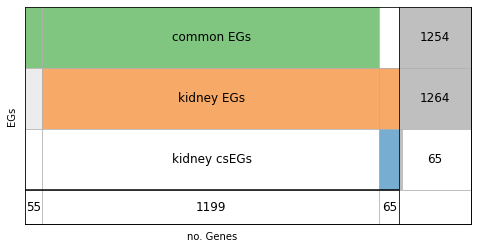

In [13]:
from HELPpy.visualization.plot import svenn_intesect
svenn_intesect([set(cs_EG_kidney),set(EG_kidney), set(cEG)], labels=['kidney csEGs', 'kidney EGs', 'common EGs'], ylabel='EGs', figsize=(8,4))

The plot shows that the Kidney tissue shares 1193 EGs with all the other tissues (over a total of 1250 cEGs) and has 60 csEGs.

Show the supervenn plot of Kidney csEGs against Lung csEGs.

Selecting 119 cell-lines


  0%|          | 0/119 [00:00<?, ?it/s]

100%|██████████| 119/119 [00:00<00:00, 224.46it/s]


['ACO2' 'AP2M1' 'ATP5F1D' 'BORA' 'CCDC86' 'CDK2' 'CKS1B' 'COPS3' 'CYCS'
 'DCTN3' 'DDX11' 'DDX39B' 'DGCR8' 'GEMIN7' 'NCAPH2' 'NFYB' 'NUMA1'
 'NUP153' 'OXA1L' 'PI4KA' 'PPAT' 'PTCD3' 'SCD' 'SLBP' 'SLC25A3' 'TFRC'
 'TRPM7' 'YPEL5' 'YTHDC1' 'ZNF335' 'ZNF407']


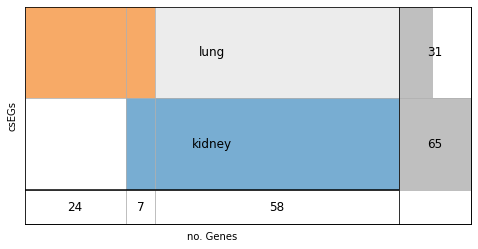

In [14]:
from HELPpy.visualization.plot import svenn_intesect
from HELPpy.utility.selection import select_cell_lines
from HELPpy.models.labelling import labelling
tissueL = 'Lung'
#a) Identify Lung EGs (as in Example 1)
cell_linesL = select_cell_lines(df_nonan, df_map, [tissueL])
print(f"Selecting {len(cell_linesL)} cell-lines")
df_labelL = labelling(df_nonan, columns = cell_linesL, n_classes=2,
                      labelnames={0: 'E', 1: 'NE'},
                      mode='flat-multi', algorithm='otsu')

#b) Compute Lung csEGs
np.set_printoptions(threshold=sys.maxsize)
EG_lung = df_labelL[df_labelL['label'] == 'E'].index.values
cs_EG_lung = np.setdiff1d(EG_lung, cEG)
print(cs_EG_lung)
with open("csEG_Lung.txt", 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(cs_EG_lung)))

#Show the supervenn plot
svenn_intesect([set(cs_EG_kidney), set(cs_EG_lung)], labels=['kidney', 'lung'], ylabel='csEGs', figsize=(8,4))